In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np


In [4]:
data = pd.read_csv('../data/전체_데이터_합본_년도별.csv')
data.head()

,year,gu,빈집_소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),소음_소계,대기_소계,수질_소계
0,2020,종로구,2194,330,566,310,896,92,0.041,0.003,0.7,0.003,35.0,25.0,2016,111,206
1,2020,종로구,2194,330,566,310,896,92,0.045,0.002,0.9,0.004,49.0,37.0,2016,111,206
2,2020,종로구,2194,330,566,310,896,92,0.038,0.010,0.9,0.004,66.0,48.0,2016,111,206
3,2020,종로구,2194,330,566,310,896,92,0.042,0.013,1.0,0.005,55.0,41.0,2016,111,206
4,2020,종로구,2194,330,566,310,896,92,0.050,0.007,1.0,0.005,54.0,40.0,2016,111,206


In [5]:
df = data[['gu','빈집_소계', '아황산가스농도(ppm)', '이산화질소농도(ppm)', '일산화탄소농도(ppm)', '소음_소계', '대기_소계', '수질_소계']]
df

,gu,빈집_소계,아황산가스농도(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),소음_소계,대기_소계,수질_소계
0,종로구,2194,0.003,0.041,0.7,2016,111,206
1,종로구,2194,0.004,0.045,0.9,2016,111,206
2,종로구,2194,0.004,0.038,0.9,2016,111,206
3,종로구,2194,0.005,0.042,1.0,2016,111,206
4,종로구,2194,0.005,0.050,1.0,2016,111,206
...,...,...,...,...,...,...,...,...
27395,강동구,5183,0.003,0.040,0.7,3750,46,94
27396,강동구,5183,0.003,0.026,0.5,3750,46,94
27397,강동구,5183,0.003,0.031,0.5,3750,46,94
27398,강동구,5183,0.003,0.030,0.5,3750,46,94


#### 다중선형회귀를 통한 서울시 주택공실률과 세부 환경오염 지수와의 상관관계 분석

종속변수 : 빈집_소계

독립변수 : 아황산가스농도(ppm), 이산화질소농도(ppm), 일산화탄소농도(ppm), 소음_소계, 소음_생활, 수질_3종, 대기_1종, 대기_소계, 수질_소계

- 평가 지표
    1. MSE(Mean Squared Error)
    - 값의 범위 : mse 값이 0에 가까울 수록 모델의 오차가 적은 것(예측이 완벽함을 의미)

    2. R^2 SCORE 결정계수 
    - R^2 값이 1에 가까울 수록 모델이 데이터의 분산을 잘 설명하고 있음 (0에가까울 수록 분산 설명이 안되고 있다는 것을 의미)
    - R^2 값이 높을 수록 모델의 예측 능력이 좋은 것

In [6]:
# 독립변수와 종속변수 설정
X = data[['아황산가스농도(ppm)', '이산화질소농도(ppm)', '일산화탄소농도(ppm)', '소음_소계',  '대기_소계', '수질_소계']]

y = data['빈집_소계']


# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print( len(X_train), len(X_test), len(y_train), len(y_test))

21920 5480 21920 5480


In [8]:
X

,아황산가스농도(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),소음_소계,대기_소계,수질_소계
0,0.003,0.041,0.7,2016,111,206
1,0.004,0.045,0.9,2016,111,206
2,0.004,0.038,0.9,2016,111,206
3,0.005,0.042,1.0,2016,111,206
4,0.005,0.050,1.0,2016,111,206
...,...,...,...,...,...,...
27395,0.003,0.040,0.7,3750,46,94
27396,0.003,0.026,0.5,3750,46,94
27397,0.003,0.031,0.5,3750,46,94
27398,0.003,0.030,0.5,3750,46,94


In [9]:

# 데이터 스케일링 - StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 1870.2069028023711
Root Mean Squared Error: 2166.3225024528147
R^2 Score: 0.28813743432263683


#### 변수 간의 다중 공선성 파악
- 1차 실험에서 MSE 값이 높게 나와 독립변수들간의 강한 상관관계가 존재하는지(다중공선성) 먼저 파악하고자 한다.
- 변수들간의 다중공선성을 파악 하기 위해 독립변수들 간의 분산 팽창 계수를 계산하고자 한다. 

In [10]:
X.columns

Index(['아황산가스농도(ppm)', '이산화질소농도(ppm)', '일산화탄소농도(ppm)', '소음_소계', '대기_소계',
       '수질_소계'],
      dtype='object')

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터 프레임 생성
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# VIF 계산
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        feature        VIF
0  아황산가스농도(ppm)  14.272397
1  이산화질소농도(ppm)  11.532779
2  일산화탄소농도(ppm)  18.936559
3         소음_소계   4.733674
4         대기_소계  19.155025
5         수질_소계  21.207030


결과 분석
- 대기오염물질 중 (아황산가스농도(ppm),이산화질소농도(ppm),일산화탄소농도(ppm)) VIF가 높으므로 VIF가 낮은 이산화질소농도를 사용
- 독립변수 개수를 이산화질소농도, 소음_소계, 수질_소계로 변경

In [12]:
# 독립변수 재선택
X= X[[ '이산화질소농도(ppm)','소음_소계',  '수질_소계']]

In [13]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# VIF 계산
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        feature       VIF
0  이산화질소농도(ppm)  3.075818
1         소음_소계  2.894838
2         수질_소계  3.007207


In [14]:
X.columns

Index(['이산화질소농도(ppm)', '소음_소계', '수질_소계'], dtype='object')

In [15]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 설정: 주성분 개수를 선택 (예: 2개의 주성분)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 1933.5862338605996
Root Mean Squared Error: 2221.4240437612484
R^2 Score: 0.2514636932941482


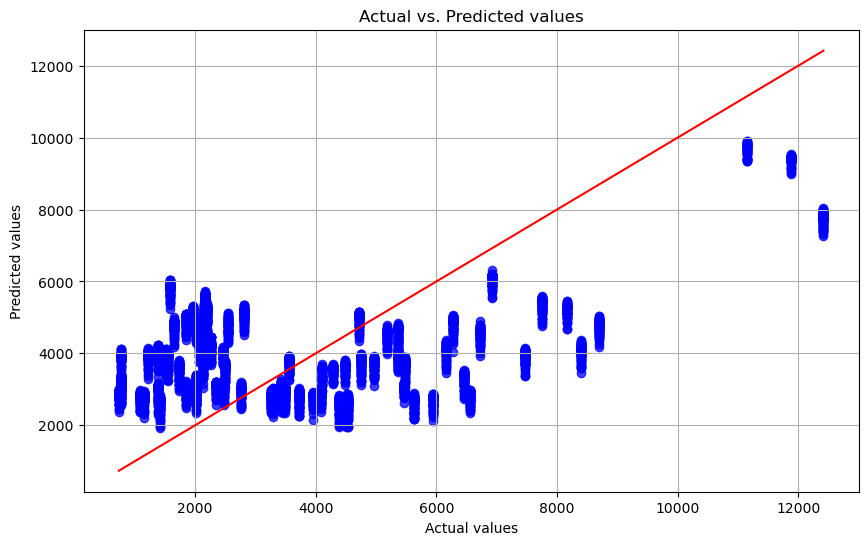

In [16]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값을 산점도로 표현
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='b')  # 실제 값과 예측 값 비교
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')  # 완벽한 예측을 나타내는 선
plt.grid(True)
plt.show()


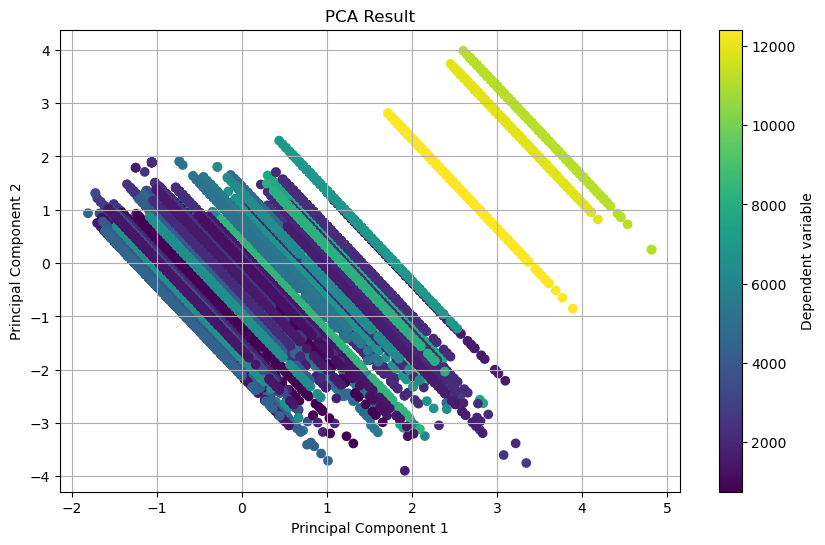

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # PCA 결과에 따른 데이터 포인트 색상을 종속 변수 y에 따라 구분
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Dependent variable')
plt.title('PCA Result')
plt.grid(True)
plt.show()


### 비선형관계 파악을 위한 랜덤포레스트 

Mean Absolute Error (MAE): 94.91638686131556
Root Mean Squared Error: 452.5988412953951
R^2 Score: 0.9689274561742955
Adjusted R^2 Score: 0.9689161096182153


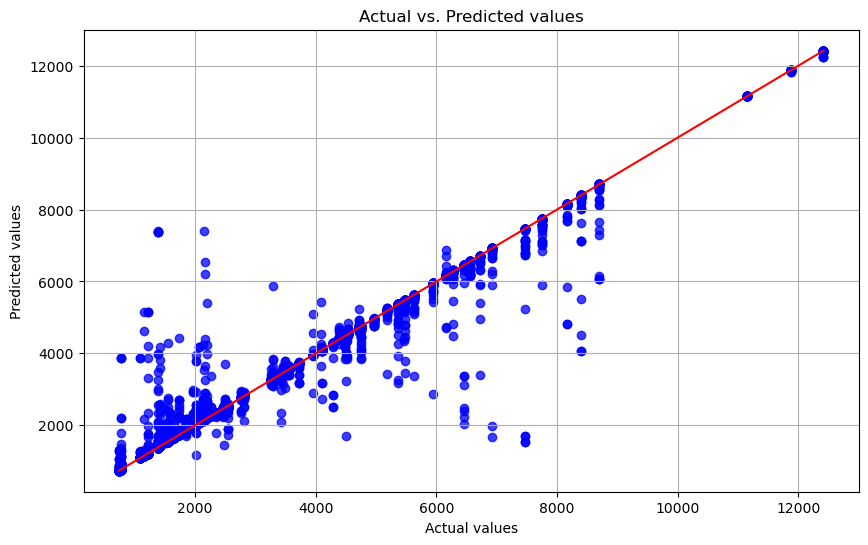

In [21]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 독립 변수 스케일링
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# 종속 변수 스케일링
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# PCA 설정: 주성분 개수를 선택 (예: 2개의 주성분)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=0.2, random_state=42)

# 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_scaled = rf_model.predict(X_test)

# 스케일링된 종속 변수를 원래 스케일로 되돌리기
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)
# MAE 계산
mae = mean_absolute_error(y_test_original, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

# 조정된 R² 값 계산 함수
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# 데이터 포인트의 수 (n)와 독립 변수의 수 (p)
n = len(y_test_original)
p = X_train.shape[1]

# 조정된 R² 값 계산
r2_adj = adjusted_r2(r2, n, p)
print("Adjusted R^2 Score:", r2_adj)


# 실제 값과 예측 값의 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.75, color='b')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r')
plt.grid(True)
plt.show()

In [19]:
y.describe()

count    27400.000000
mean      3924.412555
std       2599.990688
min        735.000000
25%       2010.000000
50%       3424.000000
75%       5371.000000
max      12417.000000
Name: 빈집_소계, dtype: float64

#### 결과 분석
- RMSE 해석 방향   
   -  RMSE 값이 평균 값에 비해 작은 비율이면, 모델의 예측 성능이 좋다고 볼 수 있음.
   - 표준 편차와 비교하여, RMSE 값이 표준 편차보다 작거나 비슷하면, 예측 성능이 어느 정도 만족스럽다고 평가할 수 있음

- 결과 
   - 평균값 대비 RMSE
      - RMSE 값이 452.60이라는 것은 종속 변수의 평균값(3924.41)과 비교했을 때 약 11.5% (452.60 / 3924.41)의 상대적 오류를 나타냄
      - 이는 모델이 예측할 때 평균적으로 실제 값에서 약 452.60 단위 정도 벗어나기 때문에 모델의 예측 성능이 상당히 좋은 편임. 
   - 표준편차 대비 RMSE
      - 표준편차의 약 17.4% (452.60 / 2599.99)에 해당하는 RMSE 값은  데이터의 변동성에 비해 예측 오류가 작고,  모델의 예측 정확도가 높음을 나타냄. 

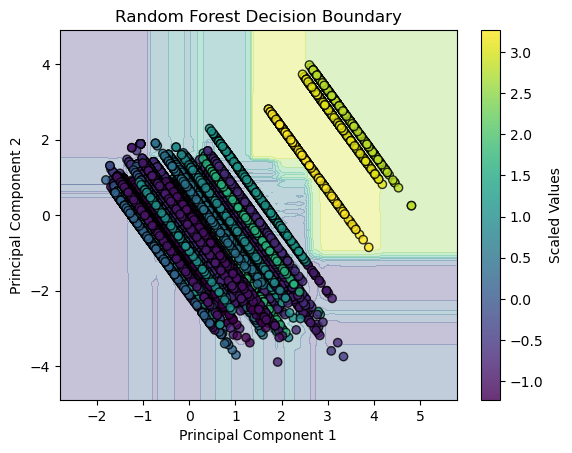

In [20]:
# 비선형 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', alpha=0.8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Random Forest Decision Boundary')
    plt.colorbar(scatter, label='Scaled Values')
    plt.show()
    
plot_decision_boundary(X_pca, y_scaled, rf_model)

#### 특성 중요도 추출 및 시각화 

In [26]:
# 특성 중요도 추출
importances = rf_model.feature_importances_
feature_names = ['이산화질소농도(ppm)', '소음_소계', '수질_소계']

# 특성 중요도 정렬
indices = np.argsort(importances)[::-1]


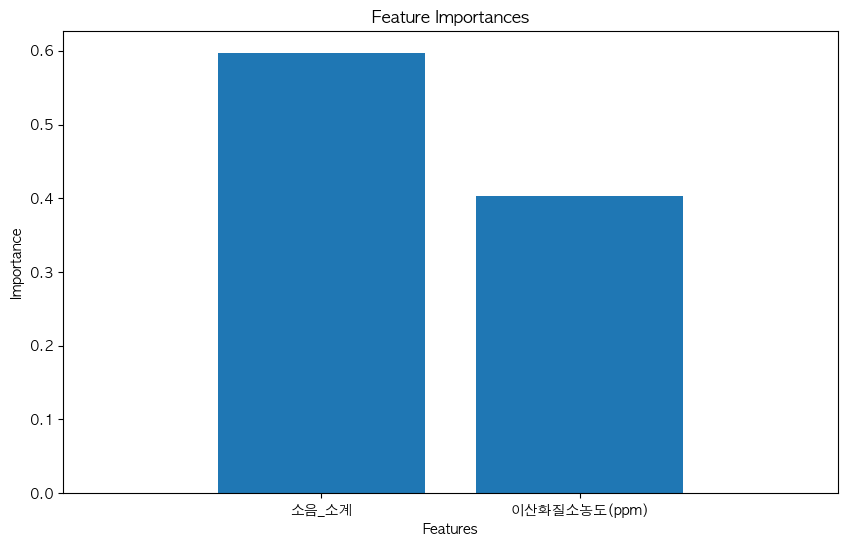

In [27]:
from matplotlib import rc  
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlim([-1, len(importances)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()